# Working with excel files, level 1

In [12]:
import pandas as pd
import numpy as np

## import the dataframe

In [2]:
df = pd.read_excel('data/mydata.xlsx')
df.head(3)

,UA,United Air Lines Inc.
0,AA,American Airlines Inc.
1,US,US Airways Inc.
2,F9,Frontier Airlines Inc.


Notice that only the first worksheet is loaded, even though our Excel spreadsheet has two worksheets.

## Loading all work sheets

In [3]:
df = pd.read_excel(
    'data/mydata.xlsx', 
    sheet_name=None
)

The result is not a Pandas DataFrame anymore; rather it is a dictionary of dataframes

In [4]:
df

{'airlines':     UA         United Air Lines Inc.
 0   AA        American Airlines Inc.
 1   US               US Airways Inc.
 2   F9        Frontier Airlines Inc.
 3   B6               JetBlue Airways
 4   OO         Skywest Airlines Inc.
 5   AS          Alaska Airlines Inc.
 6   NK              Spirit Air Lines
 7   WN        Southwest Airlines Co.
 8   DL          Delta Air Lines Inc.
 9   EV   Atlantic Southeast Airlines
 10  HA        Hawaiian Airlines Inc.
 11  MQ  American Eagle Airlines Inc.
 12  VX                Virgin America,
 'airports':     IATA_CODE                              AIRPORT  \
 0         ABE  Lehigh Valley International Airport   
 1         ABI             Abilene Regional Airport   
 2         ABQ    Albuquerque International Sunport   
 3         ABR            Aberdeen Regional Airport   
 4         ABY   Southwest Georgia Regional Airport   
 ..        ...                                  ...   
 317       WRG                     Wrangell Airport   
 31

In [5]:
df['airlines']

,UA,United Air Lines Inc.
0,AA,American Airlines Inc.
1,US,US Airways Inc.
2,F9,Frontier Airlines Inc.
3,B6,JetBlue Airways
4,OO,Skywest Airlines Inc.
5,AS,Alaska Airlines Inc.
6,NK,Spirit Air Lines
7,WN,Southwest Airlines Co.
8,DL,Delta Air Lines Inc.
9,EV,Atlantic Southeast Airlines


## Loading Specific Worksheets

In [10]:
# if you want to read only on sheet yo can pass the name inside quotes but if you want to read multiple sheets pass the names inside a list and it will return a dictionary with dataFrames
df = pd.read_excel(
    'data/mydata.xlsx', 
    sheet_name='airports'
)

In [11]:
df

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


## Converting Types of Columns
dtypes attribute

In [13]:
df.dtypes

IATA_CODE     object
AIRPORT       object
CITY          object
STATE         object
COUNTRY       object
LATITUDE     float64
LONGITUDE    float64
dtype: object

In [16]:
df = pd.read_excel(
    'data/mydata.xlsx', 
    sheet_name='airports',
    dtype= {
        'STATE': 'category',
        'COUNTRY':'category'
    }
)
df.dtypes

IATA_CODE      object
AIRPORT        object
CITY           object
STATE        category
COUNTRY      category
LATITUDE      float64
LONGITUDE     float64
dtype: object

## Converting Values of Columns

Besides loading columns to be of a specific type, you can also perform values conversion during loading time using the converters parameter.

**Example**
    
    suppose I want to convert all the latitude and longitude values to the degrees, minutes, and seconds format.

In [17]:
# first define the function
# convert from decimal degrees to degrees, minutes, seconds
def deg_to_dms(deg):
    deg = float(deg)
    m, s = divmod(abs(deg)*3600, 60)
    d, m = divmod(m, 60)
    return int(-d if deg < 0 else d), int(m), s

In [18]:
#Then, specify the column(s) you want to convert using the converters parameter
df = pd.read_excel(
    'data/mydata.xlsx', 
    sheet_name='airports',
    dtype= {
        'STATE': 'category',
        'COUNTRY':'category'
    },
    converters={
        'LATITUDE': deg_to_dms,
        'LONGITUDE': deg_to_dms,
    }
)

In [19]:
df.head(3)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,"(40, 39, 8.496000000013737)","(-75, 26, 25.44000000000233)"
1,ABI,Abilene Regional Airport,Abilene,TX,USA,"(32, 24, 40.75200000000768)","(-99, 40, 54.839999999967404)"
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,"(35, 2, 24.79199999998673)","(-106, 36, 33.08399999997346)"


## Loading with Column Headers

use the header parameter to set column names. If you use "None" it will set the default column names that consist in numbres starting from 0

In [20]:
df = pd.read_excel(
    'data/mydata.xlsx', 
    sheet_name='airlines', 
    header=None
)

In [21]:
df.head(3)

,0,1
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.


change the headers by using the names parameter

In [23]:
df = pd.read_excel(
    'data/mydata.xlsx', 
    sheet_name='airlines', 
    header=None,
    names=[
        'IATA_CODE',
        'AIRLINE'
    ]
)
df.head(3)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.


## Loading Specific Columns

If you only want to load specific columns in the worksheet, you can use the usecols parameter

In [25]:
df = pd.read_excel(
    'data/mydata.xlsx', 
    sheet_name='airports', 
    usecols=[
        'IATA_CODE',
        'AIRPORT',
        'CITY',
        'STATE',
        'COUNTRY'
    ]
)
df.head(3)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA
1,ABI,Abilene Regional Airport,Abilene,TX,USA
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA


omitting the LATITUDE and LONGITUDE columns

In [26]:
df = pd.read_excel(
    'data/mydata.xlsx', 
    sheet_name='airports', 
    usecols=lambda column: column not in ['LATITUDE','LONGITUDE']
)
df.head(3)

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA
1,ABI,Abilene Regional Airport,Abilene,TX,USA
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA


# Working with excel files, level 2

To load the newer .xlsx Excel file format, you need to install the openpyxl package

In [ ]:
pip install openpyxl

## loading the dataset, select the rows and columns you need

In [28]:
df = pd.read_excel(
    'data/restaurant_inventory_log.xlsx', 
    sheet_name='Inventory Worksheets'
)

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [29]:
df

,Unnamed: 0,Inventory Item,Active,Location,Vendor,Sub Cat,Cat,Order Unit,Pack/Size,current CS/PUR Unit Price,IUM to PUM Ratio,current IUM Price,Week 11 Count,WK COUNT BY,WK INV Value,Comments,Location Position
0,NaN,10oz Soup bowl,y,Dish Rack,Edon,50203 · KITCHEN,SUPPLIES,Each,Each,26.30,12.0,2.191667,NaN,Each,0.0,NaN,NaN
1,NaN,Abita Turbo,Y,Tiki Bar,Faust,50010 · BOTTLED BEER,LBW,Case,24/12oz,29.85,24.0,1.243750,NaN,Btl,0.0,NaN,NaN
2,NaN,AE Blood Orange,Y,Tiki Bar,Faust,50010 · BOTTLED BEER,LBW,each,24/12oz,30.55,24.0,1.272917,NaN,Btl,0.0,NaN,NaN
3,NaN,AE Hopped Cider,Y,Tiki Bar,Faust,50010 · BOTTLED BEER,LBW,Case,24/12oz,29.55,24.0,1.231250,NaN,Btl,0.0,NaN,NaN
4,NaN,AE Original,n,Tiki Bar,Faust,50010 · BOTTLED BEER,LBW,Case,24/12oz,29.95,24.0,1.247917,NaN,Each,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To get Pandas to load the dataframe correctly, you need to specify the columns that you want to load as well as the number of rows to load. Here, I will use the usecols and nrows parameters to do that

In [30]:
df = pd.read_excel(
    'data/restaurant_inventory_log.xlsx', 
    sheet_name='Inventory Worksheets',
    usecols="B:Q", 
    nrows=797
)

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [31]:
df

,Inventory Item,Active,Location,Vendor,Sub Cat,Cat,Order Unit,Pack/Size,current CS/PUR Unit Price,IUM to PUM Ratio,current IUM Price,Week 11 Count,WK COUNT BY,WK INV Value,Comments,Location Position
0,10oz Soup bowl,y,Dish Rack,Edon,50203 · KITCHEN,SUPPLIES,Each,Each,26.30,12.0,2.191667,NaN,Each,0,NaN,NaN
1,Abita Turbo,Y,Tiki Bar,Faust,50010 · BOTTLED BEER,LBW,Case,24/12oz,29.85,24.0,1.243750,NaN,Btl,0,NaN,NaN
2,AE Blood Orange,Y,Tiki Bar,Faust,50010 · BOTTLED BEER,LBW,each,24/12oz,30.55,24.0,1.272917,NaN,Btl,0,NaN,NaN
3,AE Hopped Cider,Y,Tiki Bar,Faust,50010 · BOTTLED BEER,LBW,Case,24/12oz,29.55,24.0,1.231250,NaN,Btl,0,NaN,NaN
4,AE Original,n,Tiki Bar,Faust,50010 · BOTTLED BEER,LBW,Case,24/12oz,29.95,24.0,1.247917,NaN,Each,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,"Worchestershire, Gallon",y,Dry Storage,Sysco,50001 · GROCERY,FOOD,Each,1/1gal,7.22,1.0,7.220000,NaN,Gallon,0,NaN,78
793,Yeast,y,Bakers Table,Sysco,50001 · GROCERY,FOOD,Case,20/1lb,51.93,20.0,2.596500,NaN,Lb,0,NaN,BT131
794,Yogurt,Y,Walk in Cooler,Sysco,50007 · DAIRY,FOOD,Case,6/32oz,16.97,6.0,2.828333,NaN,Quart,0,NaN,WC370
795,Ziegen Bock,y,Beer Cooler,DelPappa,50010 · BOTTLED BEER,LBW,Case,24/12oz,28.25,24.0,1.177083,NaN,Btl,0,NaN,NaN


## loading the dataset, skip rows that are not needed

The table looks like this and we nedd to tell what rows to skip

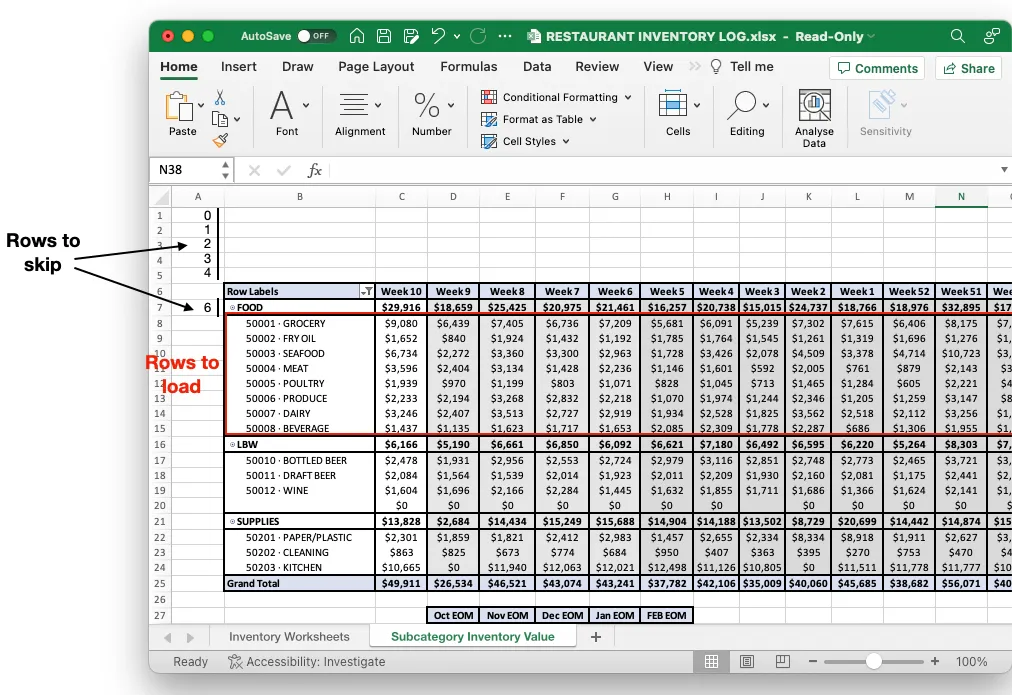

In [34]:
# list with all the rows to skip
rows_to_skip = list(range(0,5))
rows_to_skip.append(6)
rows_to_skip

[0, 1, 2, 3, 4, 6]

use the skiprows, usecols, and nrows parameters to load the data from the exact locations in the worksheet

In [35]:
df = pd.read_excel(
    'data/restaurant_inventory_log.xlsx', 
    sheet_name='Subcategory Inventory Value',
    skiprows=rows_to_skip,
    usecols="B:AA", 
    nrows=8
)

In [36]:
df

,Row Labels,Week 10,Week 9,Week 8,Week 7,Week 6,Week 5,Week 4,Week 3,Week 2,...,Week 47,Week 46,Week 45,Week 44,Week 43,Week 42,Week 41,Week 40,Week 39,Week 38
0,50001 · GROCERY,9079.624449,6438.606393,7404.893224,6735.850162,7208.729922,5681.268986,6090.992406,5239.063430,7302.007152,...,6780.63,6533.636534,6384.21,8770.260575,6235.193567,6009.178671,5498.903267,7891.014628,5613.727580,6760.26
1,50002 · FRY OIL,1651.855000,839.790000,1924.170000,1432.200000,1192.260000,1784.670000,1764.210000,1545.195000,1260.936000,...,974.45,693.705000,1107.67,1624.630000,1424.072500,818.795000,1472.005000,1507.072500,1324.425000,1083.12
2,50003 · SEAFOOD,6733.582000,2271.991000,3360.121167,3299.505333,2962.971000,1727.917800,3426.474600,2077.654600,4508.792200,...,3006.29,3507.198200,3414.39,5273.140400,4294.153400,3135.867800,3390.035000,1929.510800,3303.967200,6205.72
3,50004 · MEAT,3595.565500,2403.595167,3133.829333,1427.592000,2236.038700,1145.944867,1601.266467,592.343333,2004.814267,...,1367.88,2073.753800,1306.07,4414.919467,1737.869600,1193.560133,519.132000,947.986000,823.741600,2394.04
4,50005 · POULTRY,1939.337400,969.785695,1198.529395,802.822475,1071.131160,828.338240,1044.526374,713.127900,1465.124760,...,2296.20,1625.510130,836.04,3244.651050,1760.631920,1513.491300,526.375250,650.449500,389.803250,1616.19
5,50006 · PRODUCE,2233.441658,2193.659713,3267.951244,2832.234436,2218.019429,1070.009093,1973.594520,1244.300408,2346.468290,...,1739.51,2282.052424,1262.85,3907.938730,2194.028440,1384.646944,951.475030,2379.815025,958.329534,3470.28
6,50007 · DAIRY,3246.282148,2406.915787,3512.914227,2727.149097,2918.946172,1933.890169,2527.841626,1825.128426,3561.836194,...,3237.74,3016.641807,3150.20,5384.562094,3181.153011,2808.714950,2156.461950,2811.456867,1954.527889,3992.79
7,50008 · BEVERAGE,1436.668542,1134.977542,1623.065500,1717.493167,1653.013792,2084.696250,2309.220538,1778.020083,2286.840833,...,1721.18,2040.934750,2512.09,3376.426833,1829.562625,1822.840917,2102.522062,1887.767625,2630.973292,2734.05
